Среда или требования к инференсу модели для вашего проекта могут быть устроены так, что потребуют реализации на языке программирования, отличном от Python. Например, если компания разрабатывает десктопное приложение, то для внедрения модели её потребуется «перевести» на Java или C++. Как это сделать?


# PREDICTIVE MODEL MARKUP LANGUAGE

В таких случаях используется генерация файла формата PMML (Predictive Model Markup Language).

## **PMML** — это XML-диалект, который применяется для описания статистических и DS-моделей. PMML-совместимые приложения позволяют легко обмениваться моделями данных между собой. Разработка и внедрение PMML осуществляется IT-консорциумом Data Mining Group.

Подробнее с PMML можно ознакомиться на [официальном сайте](http://dmg.org/pmml/v4-4/GeneralStructure.html).



К сожалению, далеко не все библиотеки для машинного обучения (в том числе sklearn) поддерживают возможность сохранения обученной модели в указанном формате. Однако для этого можно использовать сторонние библиотеки, и одной из самых популярных является [Nyoka](https://nyoka-pmml.github.io/nyoka/).

Давайте сохраним модель из предыдущего блока в формат PMML.

Для установки можно использовать систему управления пакетами pip:

In [1]:
!pip3 install nyoka

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.8/303.8 kB 5.0 MB/s eta 0:00:00


Рассмотрим пример работы с библиотекой:

In [2]:
from nyoka import skl_to_pmml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
cols = load_diabetes()['feature_names']

scaler = MinMaxScaler()
pipe = Pipeline([  
            ('Scaling', MinMaxScaler()),
            ('Linear', LinearRegression())
        ])
# Обучение пайплайна, включающего линейную модель и нормализацию признаков
pipe.fit(X, y)
# Сохраним пайплайн в формате pmml в файл pipeline.pmml
skl_to_pmml(pipeline=pipe, col_names=cols, pmml_f_name="pipeline.pmml")

Итак, мы построили пайплайн обработки данных и обучили модель линейной регрессии. После этого мы с помощью функции skl_to_pmml сохранили модель в файл pipe.pmml.

Откройте файл pipe.pmml с помощью любого текстового редактора.

Давайте рассмотрим этот файл подробнее:

+ Секция DataDictionary содержит информацию о признаках, включая наименование и тип данных, используемых для построения модели.
+ Секция TransformationDictionary содержит информацию о необходимых преобразованиях для каждого признака. Обратите внимание, что в этом блоке также содержится информация для трансформации. Так как мы использовали minMaxScaler(), то в файле записаны минимальное и максимальное значения.

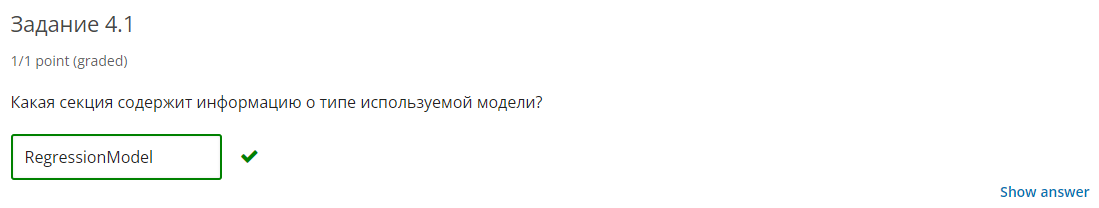

Таким образом, в файле содержится вся информация для того, чтобы пайплайн можно было использовать на любом языке программирования.

# OPEN NEURAL NETWORK EXCHANGE

В разработке моделей на основе нейронных сетей сегодня наиболее распространён формат ONNX (Open Neural Network Exchange).

## ONNX (Open Neural Network Exchange) — это открытый стандарт для обеспечения совместимости моделей машинного обучения. Он позволяет разработчикам искусственного интеллекта использовать модели с различными инфраструктурами, инструментами, средами исполнения и компиляторами.

Стандарт совместно поддерживается компаниями Microsoft, Amazon, Facebook и другими партнёрами как проект с открытым исходным кодом.

Часто стандарт ONNX и его библиотеки используют для конвертации из одного фреймворка в другой (например, из PyTorch в TensorFlow для использования в продакшене). Для конвертации различных фреймворков (не только DL) в формат ONNX и обратно существует [ряд библиотек](https://github.com/onnx):

+ [ONNX-Tensorflow;](https://github.com/onnx/onnx-tensorflow)
+ [Tensorflow-ONNX;](https://github.com/onnx/tensorflow-onnx)
+ [Keras-ONNX;](https://github.com/onnx/keras-onnx)
+ [Sklearn-ONNX.](https://github.com/onnx/sklearn-onnx)
+ и другие.

Также в рамках стандарта ONNX есть инструмент [ONNX-runtime](https://github.com/microsoft/onnxruntime). Он служит для ускорения инференса Python-моделей, а также инференса на других языках, например Java, C++.

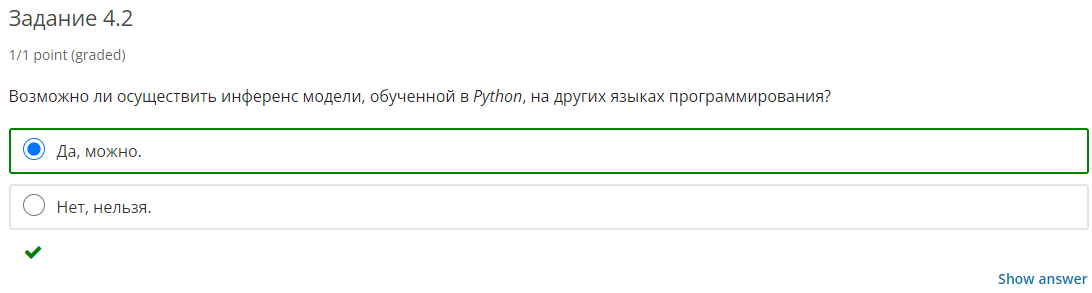

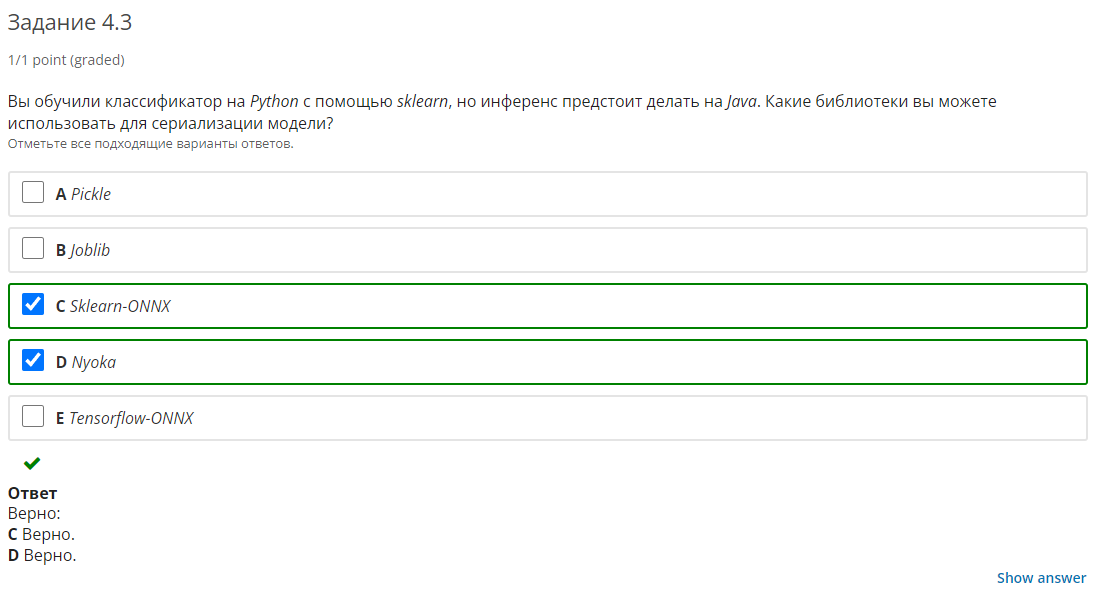

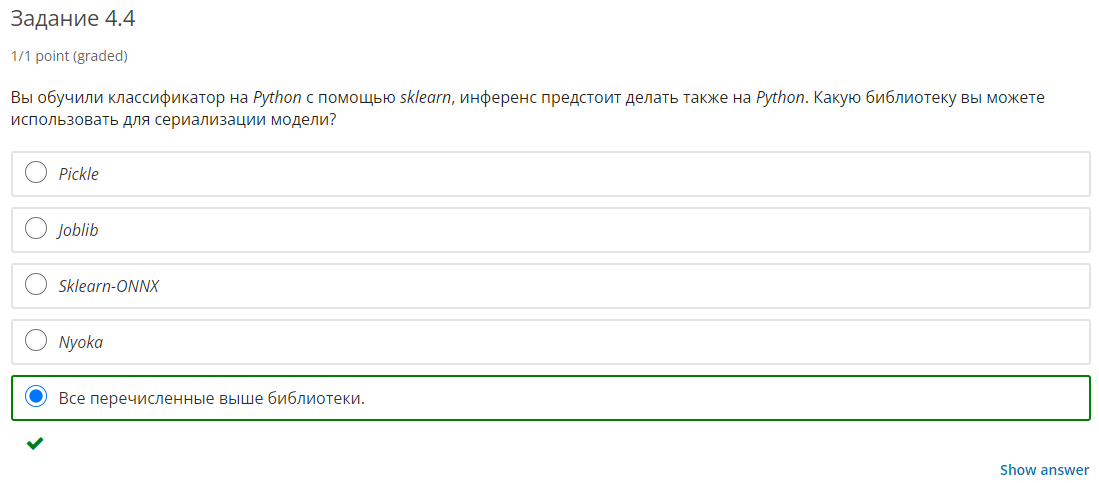

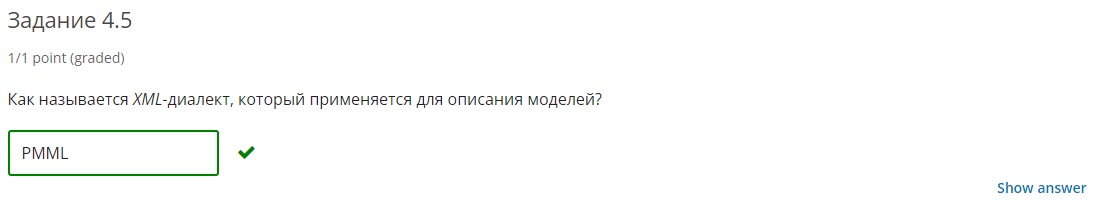

## Задание 4.6 (со звёздочкой)

Для выполнения этого задания вам понадобится ознакомиться с документацией [здесь](http://onnx.ai/sklearn-onnx/api_summary.html) и [здесь](https://onnx.ai/sklearn-onnx/).

В задаче ниже мы обучаем модель sklearn, конвертируем ее в ONNX и делаем инференс через ONNX-runtime.

Дополните код ниже недостающими элементами:



```
import onnxruntime as rt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skl2onnx import ___1___
from skl2onnx.common.data_types import ___2___


# загружаем данные
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(X_train.shape, X_test.shape)

# обучаем модель
model = LinearRegression()
model.fit(___3___, y_train)

# делаем инференс моделью на тесте
test_pred = model.predict(___4___)
print('sklearn model predict:\n', test_pred)

# конвертируем модель в ONNX-формат
initial_type = [('float_input', ___5___([None, ___6___]))]
model_onnx = ___7___(model, initial_types=initial_type)

# сохраняем модель в файл
with open("model.onnx", "wb") as f:
	f.write(model_onnx.SerializeToString())
 	 
# Делаем инференс на тесте через ONNX-runtime
sess = rt.___8___("model.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
test_pred_onnx = sess.run([label_name],
                	{input_name:  X_test.astype(np.float32)})[0].reshape(-1)
print('onnx model predict:\n',test_pred_onnx)
```



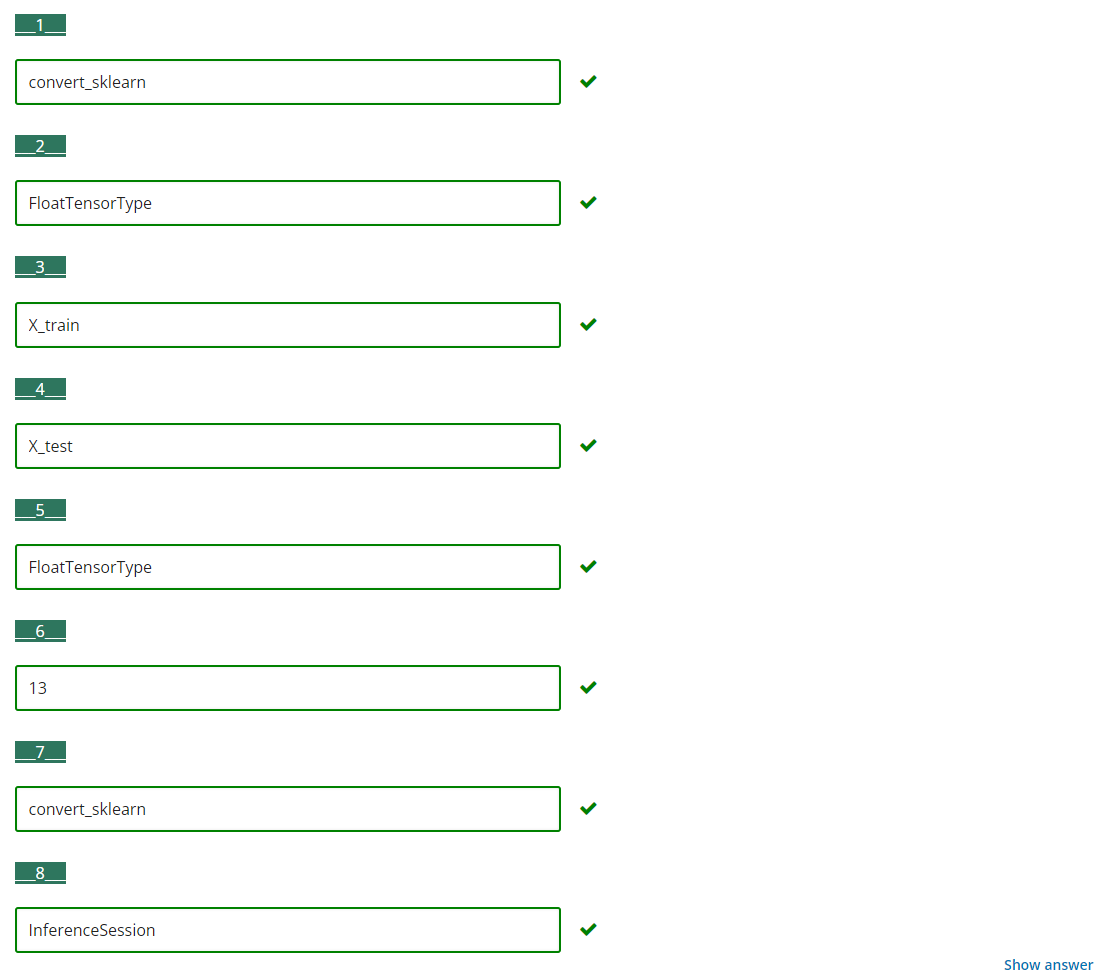